<a href="https://colab.research.google.com/github/iragca/compstat-research/blob/main/juanico_hdx_compstat_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import polars as pl
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

In [10]:
dir = '/content/drive/MyDrive'
df = pl.read_csv(dir + '/climate-change_phl.csv')
df

Country Name,Country ISO3,Year,Indicator Name,Indicator Code,Value
str,str,str,str,str,str
"""#country+name""","""#country+code""","""#date+year""","""#indicator+name""","""#indicator+code""","""#indicator+value+num"""
"""Philippines""","""PHL""","""2021""","""Agricultural land (sq. km)""","""AG.LND.AGRI.K2""","""126830"""
"""Philippines""","""PHL""","""2020""","""Agricultural land (sq. km)""","""AG.LND.AGRI.K2""","""126590"""
"""Philippines""","""PHL""","""2019""","""Agricultural land (sq. km)""","""AG.LND.AGRI.K2""","""126360"""
"""Philippines""","""PHL""","""2018""","""Agricultural land (sq. km)""","""AG.LND.AGRI.K2""","""126130"""
…,…,…,…,…,…
"""Philippines""","""PHL""","""1964""","""Urban population (% of total p…","""SP.URB.TOTL.IN.ZS""","""31.34"""
"""Philippines""","""PHL""","""1963""","""Urban population (% of total p…","""SP.URB.TOTL.IN.ZS""","""31.077"""
"""Philippines""","""PHL""","""1962""","""Urban population (% of total p…","""SP.URB.TOTL.IN.ZS""","""30.816"""


In [16]:
df_cleaned = df.slice(1)
df_cleaned = df_cleaned.with_columns([
    pl.col("Year").cast(pl.Int64, strict=False),
    pl.col("Value").cast(pl.Float64, strict=False)
])

df_wide = df_cleaned.pivot(
    index="Year",
    columns="Indicator Name",
    values="Value"
)

df_wide

<ipython-input-16-cc0d8da21a6a>:7: DeprecationWarning: The argument `columns` for `DataFrame.pivot` is deprecated. It has been renamed to `on`.
  df_wide = df_cleaned.pivot(


Year,Agricultural land (sq. km),Agricultural land (% of land area),Arable land (% of land area),Rural land area where elevation is below 5 meters (sq. km),Rural land area where elevation is below 5 meters (% of total land area),Urban land area where elevation is below 5 meters (sq. km),Urban land area where elevation is below 5 meters (% of total land area),Land area where elevation is below 5 meters (% of total land area),Forest area (sq. km),Forest area (% of land area),Agricultural irrigated land (% of total agricultural land),Average precipitation in depth (mm per year),Cereal yield (kg per hectare),"Foreign direct investment, net inflows (% of GDP)",Access to electricity (% of population),Renewable energy consumption (% of total final energy consumption),"Droughts, floods, extreme temperatures (% of population, average 1990-2009)",Rural population living in areas where elevation is below 5 meters (% of total population),Urban population living in areas where elevation is below 5 meters (% of total population),Population living in areas where elevation is below 5 meters (% of total population),Population in urban agglomerations of more than 1 million (% of total population),"Annual freshwater withdrawals, total (billion cubic meters)","Annual freshwater withdrawals, total (% of internal resources)",Terrestrial protected areas (% of total land area),Marine protected areas (% of territorial waters),Terrestrial and marine protected areas (% of total territorial area),Ease of doing business rank (1=most business-friendly regulations),"Agriculture, forestry, and fishing, value added (% of GDP)","School enrollment, primary and secondary (gross), gender parity index (GPI)","Primary completion rate, total (% of relevant age group)","Mortality rate, under-5 (per 1,000 live births)","Prevalence of underweight, weight for age (% of children under 5)",Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population),Population growth (annual %),"Population, total",Urban population growth (annual %),Urban population,Urban population (% of total population)
i64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
2021,126830.0,42.536137,18.747694,null,null,null,null,null,72234.8,24.226046,null,2348.0,3834.8,3.040789,97.5,28.0,null,null,null,null,14.168735,89.000364,18.580452,15.86869,1.744404,3.722085,null,10.069164,1.026121,91.101982,27.9,16.7,3.0,0.90566,1.1310095e8,1.486152,5.3931057e7,47.684
2020,126590.0,42.455646,18.747694,null,null,null,null,null,71885.9,24.109032,null,2348.0,3769.4,1.885864,96.4,29.1,null,null,null,null,14.051324,87.477269,18.262478,15.37247,1.159064,3.149224,null,10.185311,1.02387,98.112625,28.0,null,null,1.145514,1.12081264e8,1.693334,5.3135486e7,47.408
2019,126360.0,42.378509,18.747694,null,null,null,null,null,71537.0,23.992018,null,2348.0,3737.9,2.301175,95.3,26.9,null,null,null,null,13.973986,85.994514,17.952926,15.37247,1.159064,3.149224,95.0,8.820324,1.025195,101.023819,28.0,18.9,null,1.216155,1.10804683e8,1.730744,5.22433e7,47.149
2018,126130.0,42.301372,18.747694,null,null,null,null,null,71188.1,23.875004,null,2348.0,3670.5,2.868338,94.2,27.6,null,null,null,null,13.910755,92.157811,19.239626,15.316659,1.159063,3.141408,null,9.65014,1.025809,110.882187,28.0,19.0,3.0,1.23686,1.09465287e8,1.717687,5.1346882e7,46.907
2017,125900.0,42.224234,18.747694,null,null,null,null,null,70839.3,23.758024,null,2348.0,3692.3,3.122388,93.0,27.8,null,null,null,null,13.852652,91.79128,19.163106,15.316659,1.159063,3.141408,null,10.182954,1.01849,104.436455,27.9,null,null,1.288302,1.08119693e8,1.732714,5.0472435e7,46.682
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
1962,77920.0,26.124858,16.361564,null,null,null,null,null,null,null,null,2348.0,1025.3,null,null,null,null,null,null,null,9.211286,null,null,null,null,null,null,23.805024,null,null,96.3,null,null,3.182005,2.9723536e7,4.03258,9.159605

In [18]:
df_wide.describe()

statistic,Year,Agricultural land (sq. km),Agricultural land (% of land area),Arable land (% of land area),Rural land area where elevation is below 5 meters (sq. km),Rural land area where elevation is below 5 meters (% of total land area),Urban land area where elevation is below 5 meters (sq. km),Urban land area where elevation is below 5 meters (% of total land area),Land area where elevation is below 5 meters (% of total land area),Forest area (sq. km),Forest area (% of land area),Agricultural irrigated land (% of total agricultural land),Average precipitation in depth (mm per year),Cereal yield (kg per hectare),"Foreign direct investment, net inflows (% of GDP)",Access to electricity (% of population),Renewable energy consumption (% of total final energy consumption),"Droughts, floods, extreme temperatures (% of population, average 1990-2009)",Rural population living in areas where elevation is below 5 meters (% of total population),Urban population living in areas where elevation is below 5 meters (% of total population),Population living in areas where elevation is below 5 meters (% of total population),Population in urban agglomerations of more than 1 million (% of total population),"Annual freshwater withdrawals, total (billion cubic meters)","Annual freshwater withdrawals, total (% of internal resources)",Terrestrial protected areas (% of total land area),Marine protected areas (% of territorial waters),Terrestrial and marine protected areas (% of total territorial area),Ease of doing business rank (1=most business-friendly regulations),"Agriculture, forestry, and fishing, value added (% of GDP)","School enrollment, primary and secondary (gross), gender parity index (GPI)","Primary completion rate, total (% of relevant age group)","Mortality rate, under-5 (per 1,000 live births)","Prevalence of underweight, weight for age (% of children under 5)",Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population),Population growth (annual %),"Population, total",Urban population growth (annual %),Urban population,Urban population (% of total population)
str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""count""",64.0,61.0,62.0,62.0,3.0,3.0,3.0,3.0,3.0,33.0,33.0,6.0,61.0,62.0,54.0,30.0,32.0,1.0,3.0,3.0,3.0,64.0,16.0,16.0,7.0,7.0,7.0,1.0,64.0,29.0,28.0,63.0,13.0,8.0,63.0,64.0,63.0,64.0,64.0
"""null_count""",0.0,3.0,2.0,2.0,61.0,61.0,61.0,61.0,61.0,31.0,31.0,58.0,3.0,2.0,10.0,34.0,32.0,63.0,61.0,61.0,61.0,0.0,48.0,48.0,57.0,57.0,57.0,63.0,0.0,35.0,36.0,1.0,51.0,56.0,1.0,0.0,1.0,0.0,0.0
"""mean""",1991.5,106539.016393,35.839006,17.426432,12395.439921,4.212253,1286.153419,0.437064,4.649317,72209.795455,24.21766,8.899688,2348.0,2261.375806,1.248392,82.587473,34.334375,0.806385,5.276547,5.891995,11.168543,13.03111,85.301327,17.80821,15.490805,1.326303,3.309546,95.0,18.536709,1.019884,91.791113,57.173016,23.161538,9.7125,2.247062,6.7998e7,2.986925,2.9703e7,41.577375
"""std""",18.618987,15315.487228,5.169854,1.005586,204.947648,0.069646,204.947648,0.069646,5.5747e-12,2693.619168,0.903384,0.495031,0.0,936.916135,0.912216,9.570838,6.229255,null,0.614906,0.296718,0.714375,1.692843,3.635769,0.759033,0.259303,0.285618,0.28184,null,5.793474,0.009526,6.650204,25.118251,4.789666,4.918024,0.606559,2.7446e7,1.229231,1.4771e7,6.090709
"""min""",1960.0,77130.0,25.859988,15.570308,12170.141244,4.135691,1110.783129,0.377469,4.649317,68397.2,22.938995,8.227311,2348.0,996.3,-0.287668,65.4,26.9,0.806385,4.588541,5.575789,10.524395,8.977754,78.89,16.469729,15.316659,1.159056,3.141386,95.0,8.820324,0.99769,80.705971,27.5,16.7,3.0,0.760479,2.7891897e7,1.37306,8.450408e6,30.297
"""25%""",1976.0,96740.0,32.444579,16.550961,12445.368308,4.229219,1236.225031,0.420097,4.649317,70141.5,23.523996,8.333333,2348.0,1353.8,0.513698,74.7,30.9,0.806385,5.468579,5.935854,11.044367,13.170854,83.273,17.38476,15.32,1.159063,3.141408,95.0,13.517547,1.01531,

In [21]:
df_wide.schema

Schema([('Year', Int64),
        ('Agricultural land (sq. km)', Float64),
        ('Agricultural land (% of land area)', Float64),
        ('Arable land (% of land area)', Float64),
        ('Rural land area where elevation is below 5 meters (sq. km)',
         Float64),
        ('Rural land area where elevation is below 5 meters (% of total land area)',
         Float64),
        ('Urban land area where elevation is below 5 meters (sq. km)',
         Float64),
        ('Urban land area where elevation is below 5 meters (% of total land area)',
         Float64),
        ('Land area where elevation is below 5 meters (% of total land area)',
         Float64),
        ('Forest area (sq. km)', Float64),
        ('Forest area (% of land area)', Float64),
        ('Agricultural irrigated land (% of total agricultural land)',
         Float64),
        ('Average precipitation in depth (mm per year)', Float64),
        ('Cereal yield (kg per hectare)', Float64),
        ('Foreign direct inve

In [23]:
df_wide.write_csv('climate_change_pivot.csv')

In [39]:
sns.set_theme(style='whitegrid', palette='Oranges_d')

def make_lineplot(y):
  sns.lineplot(data=df_wide, x="Year", y= f"{y}" )
  plt.title(f"{y}", {"fontsize":18})
  plt.show()

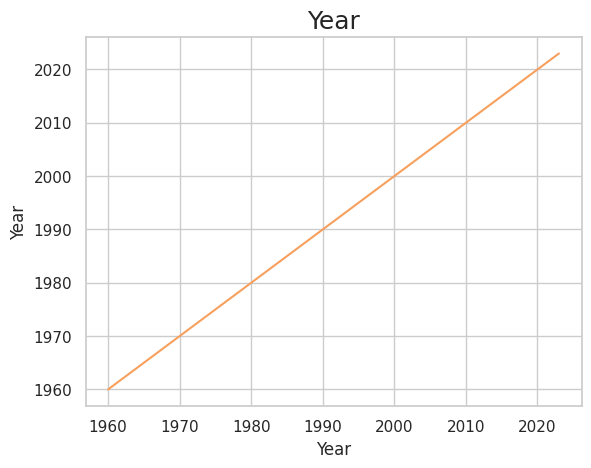

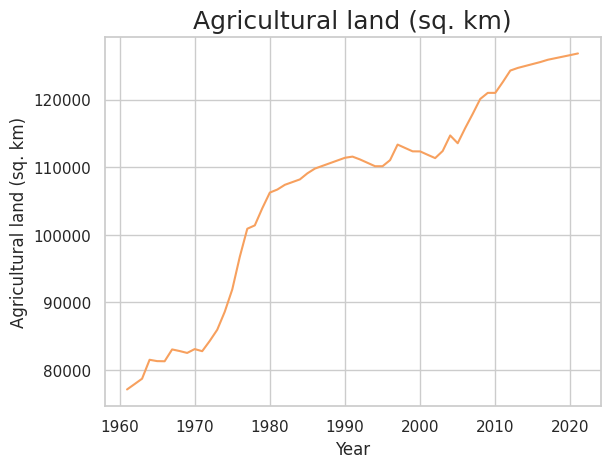

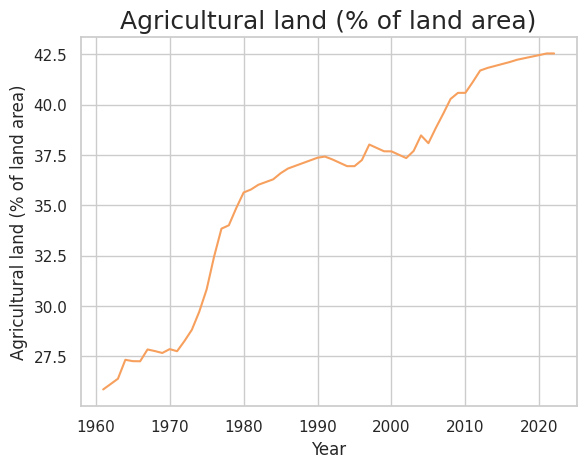

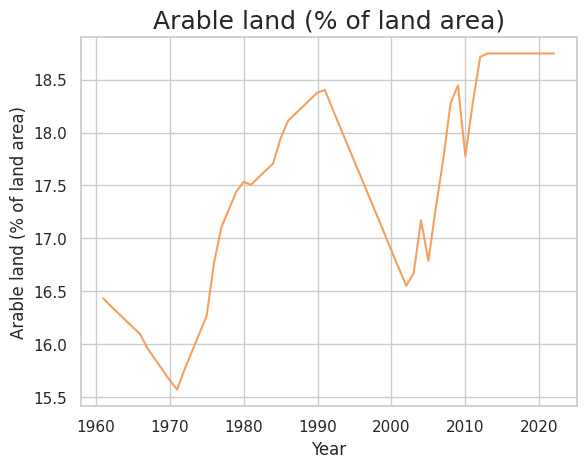

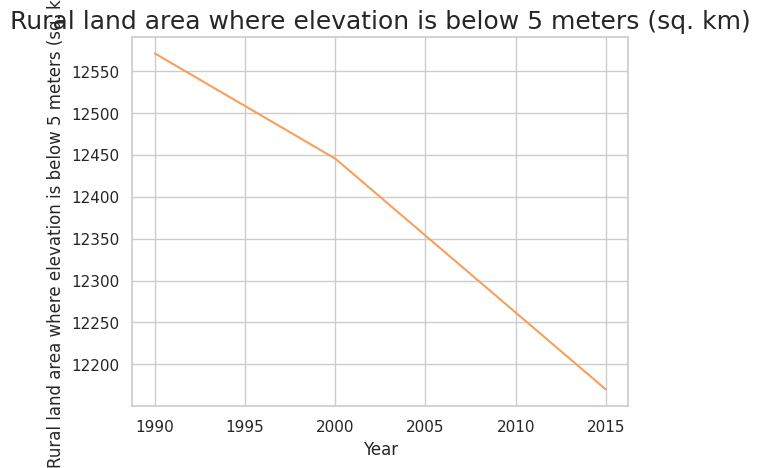

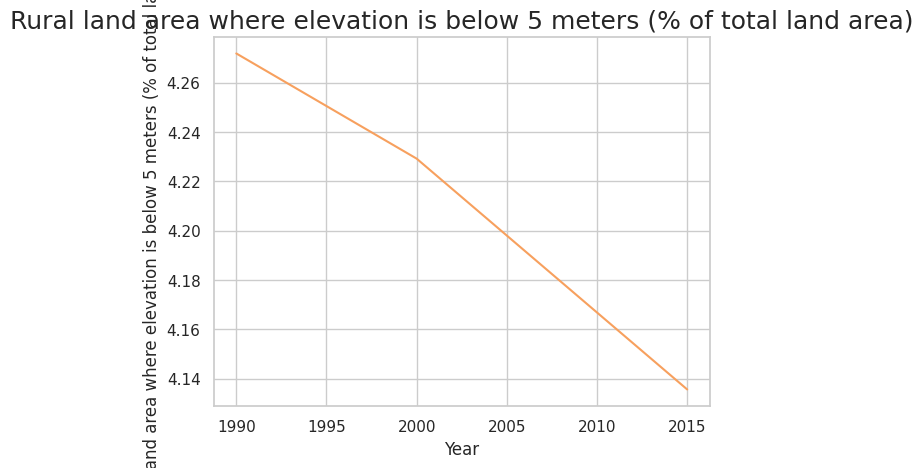

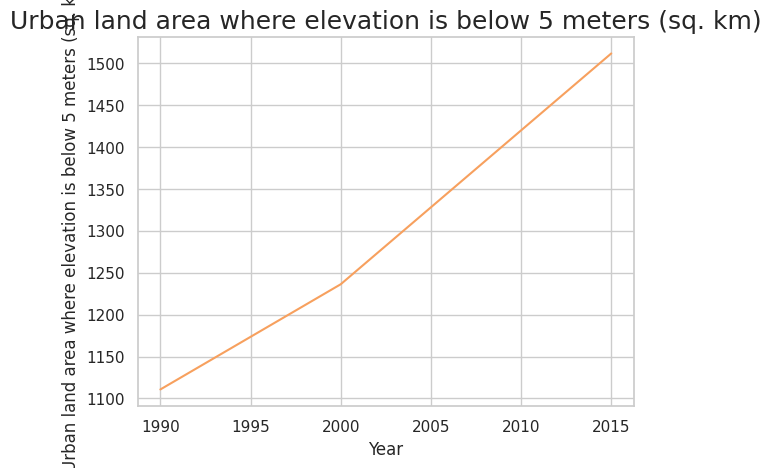

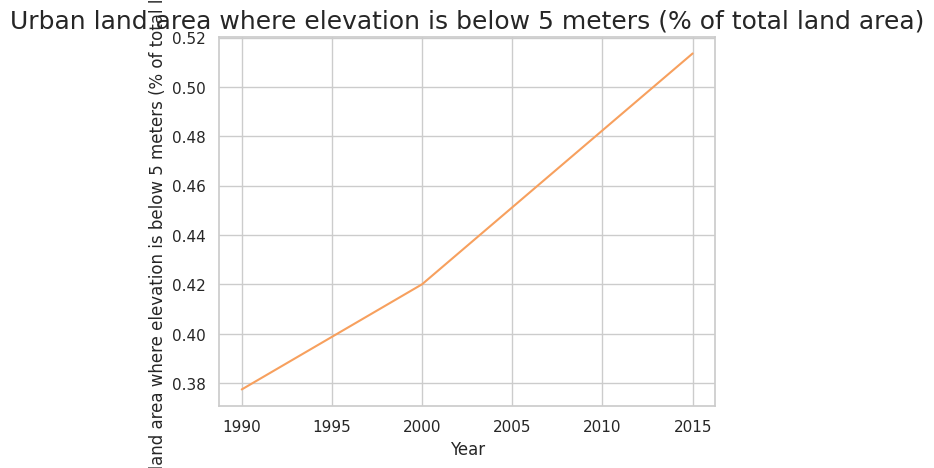

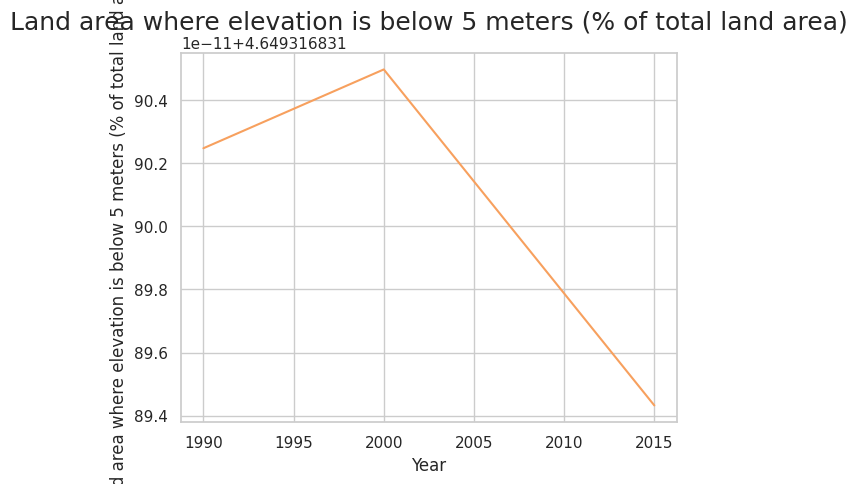

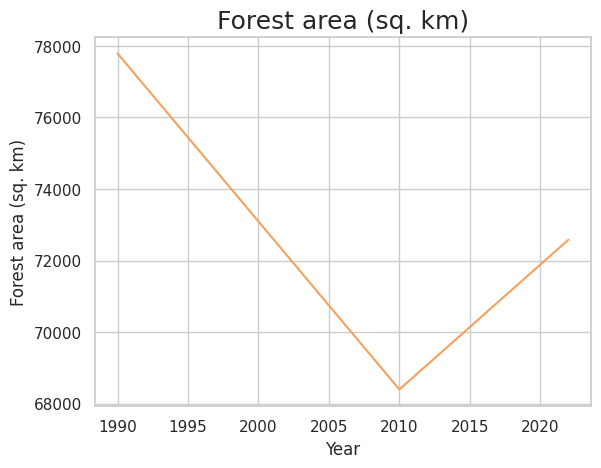

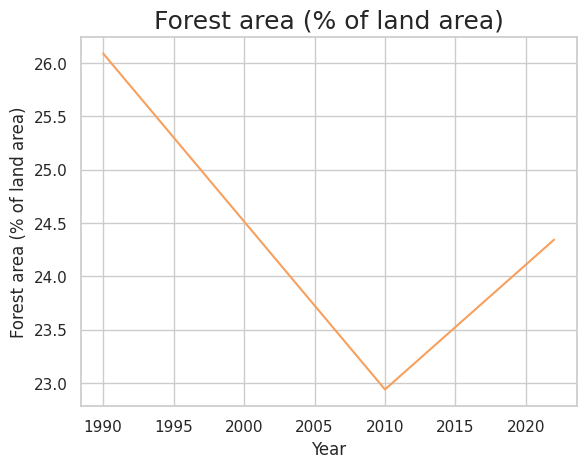

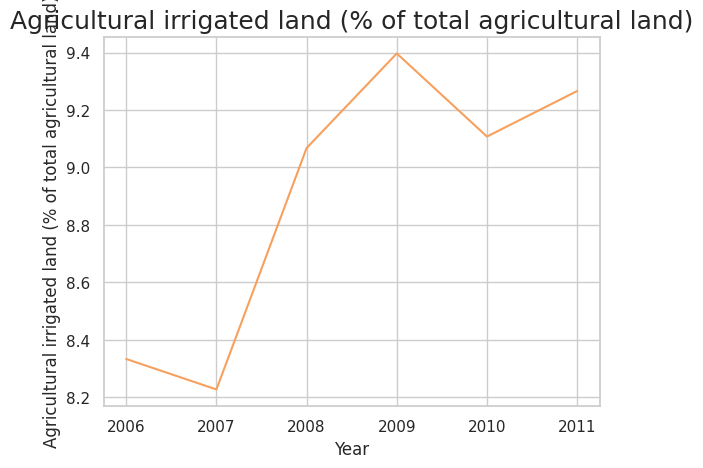

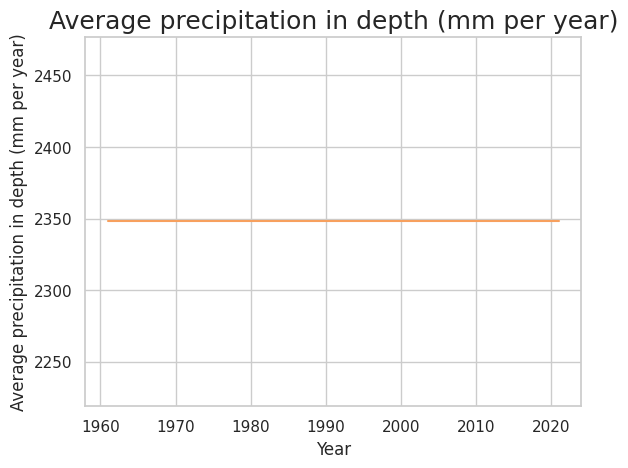

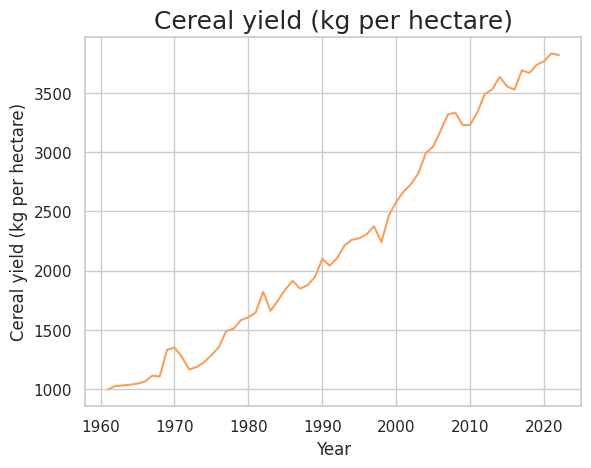

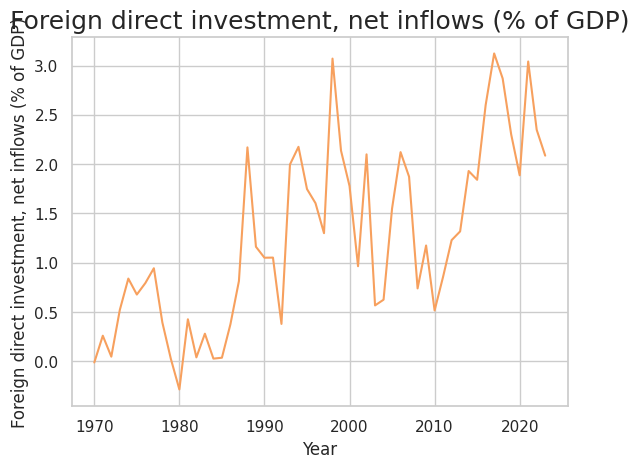

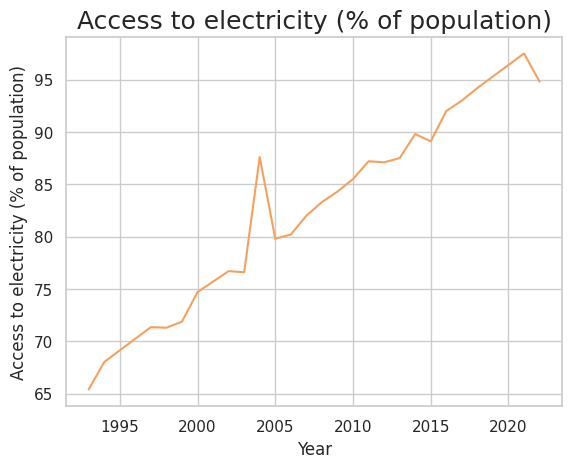

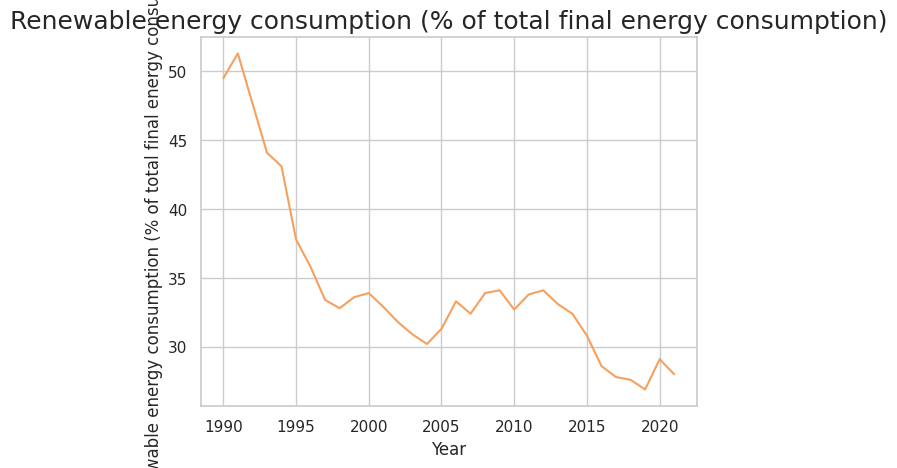

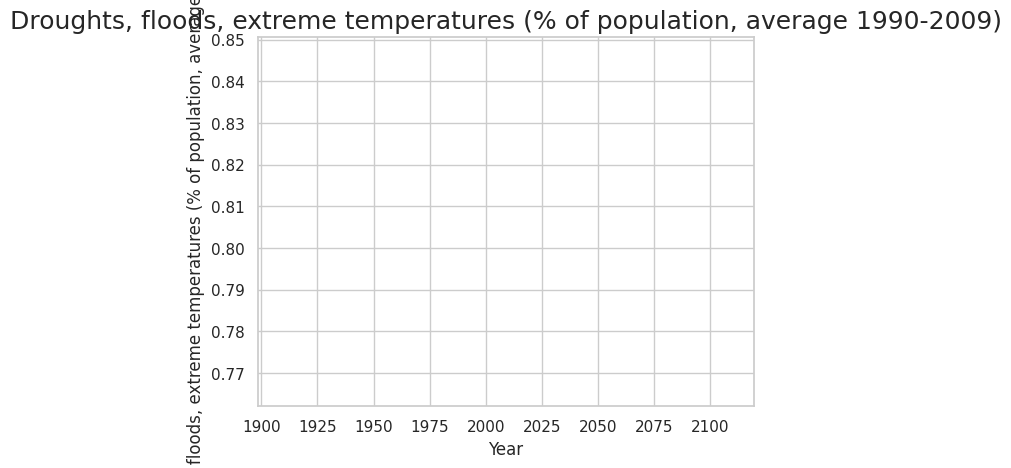

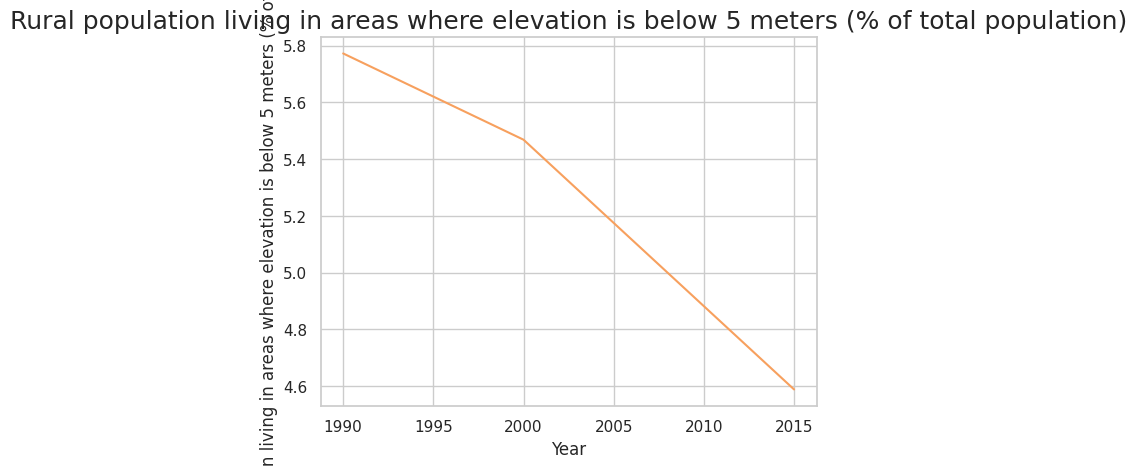

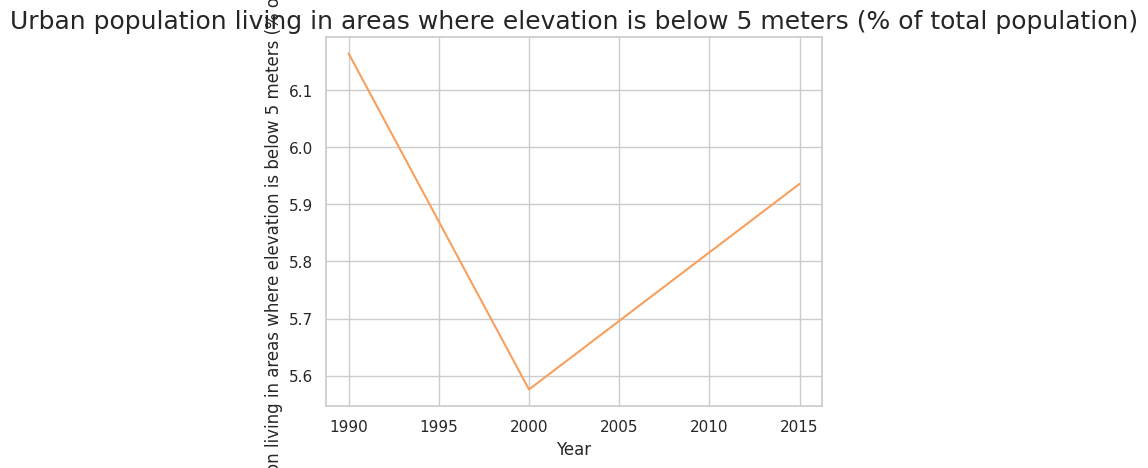

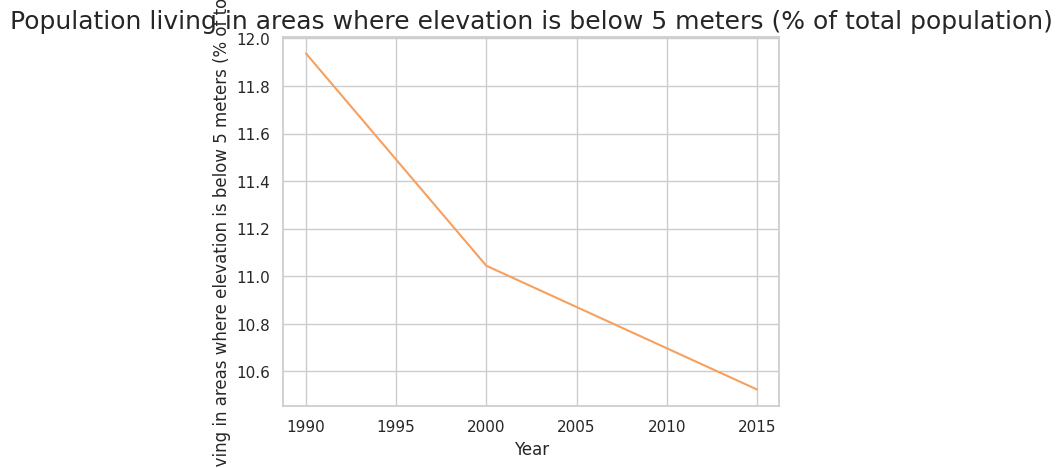

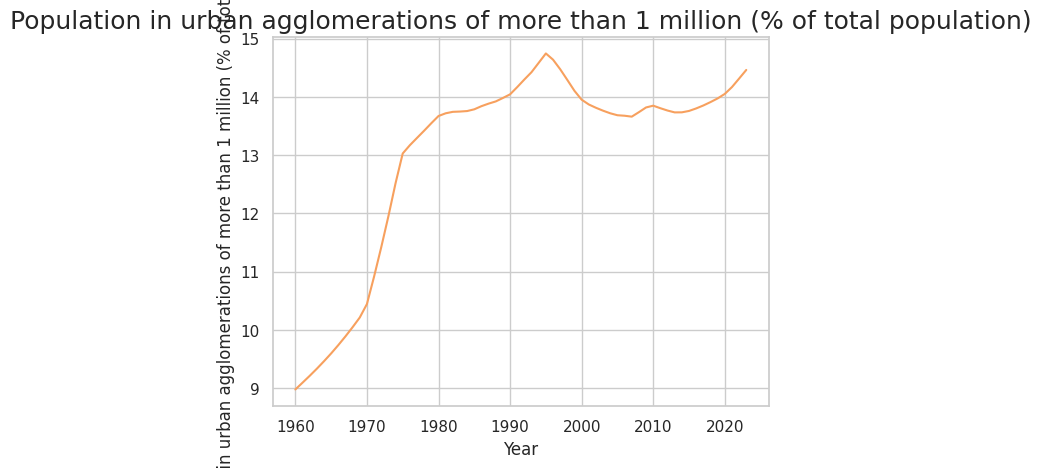

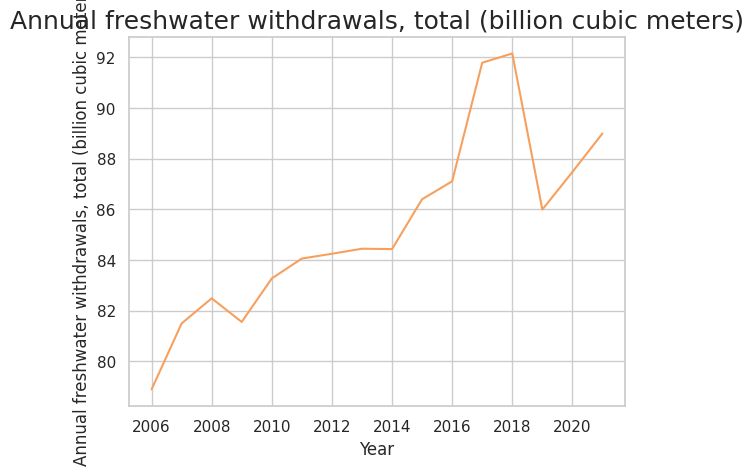

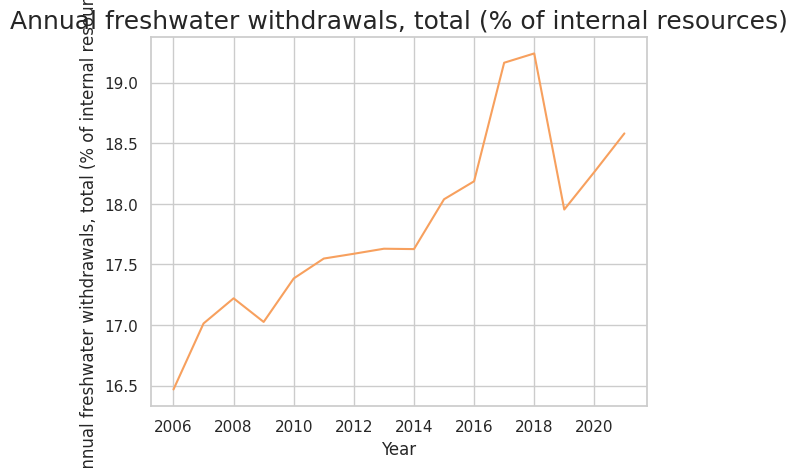

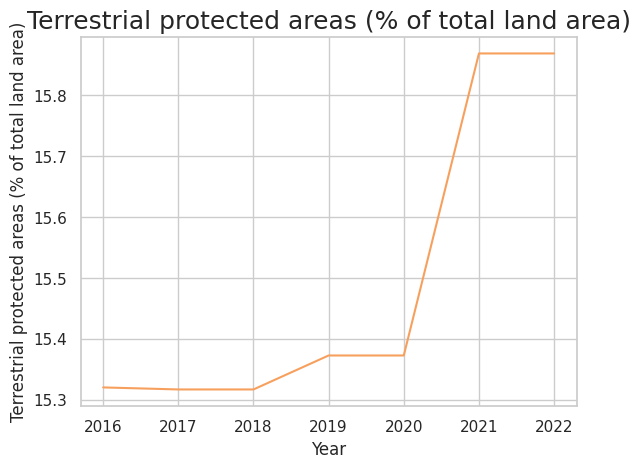

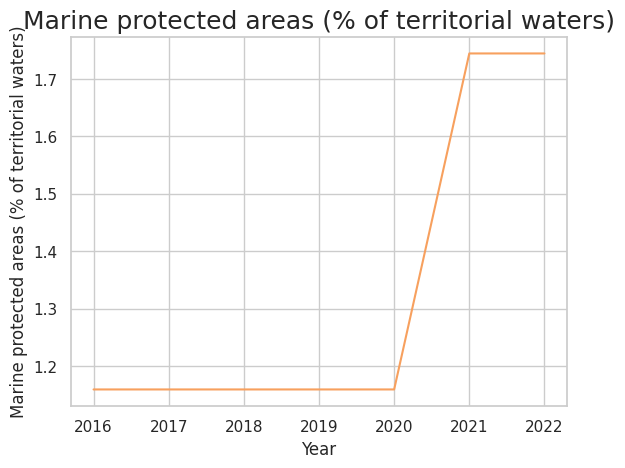

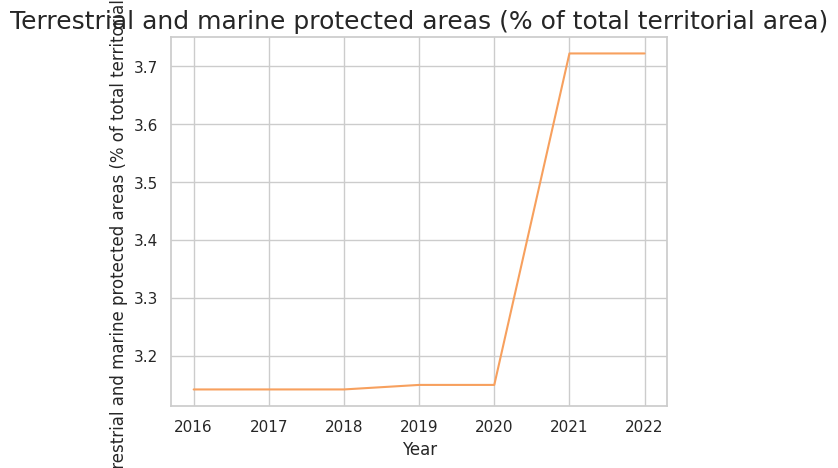

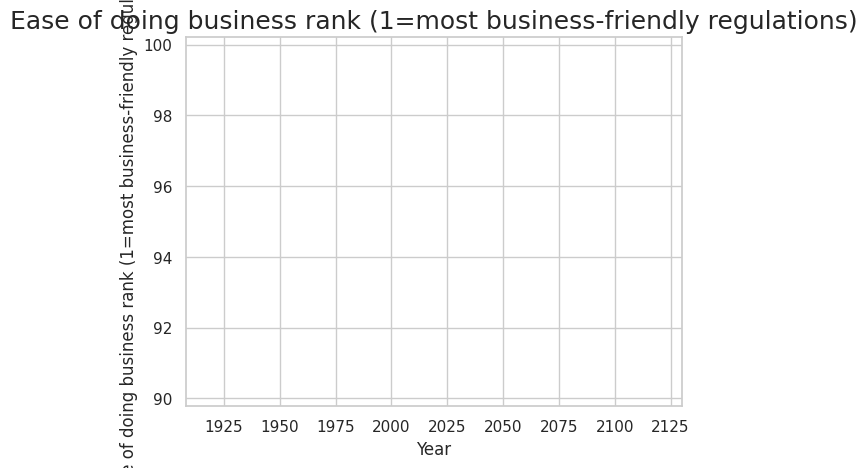

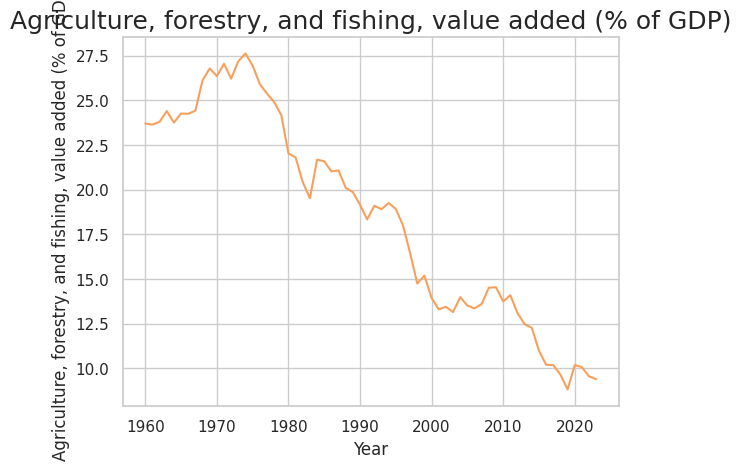

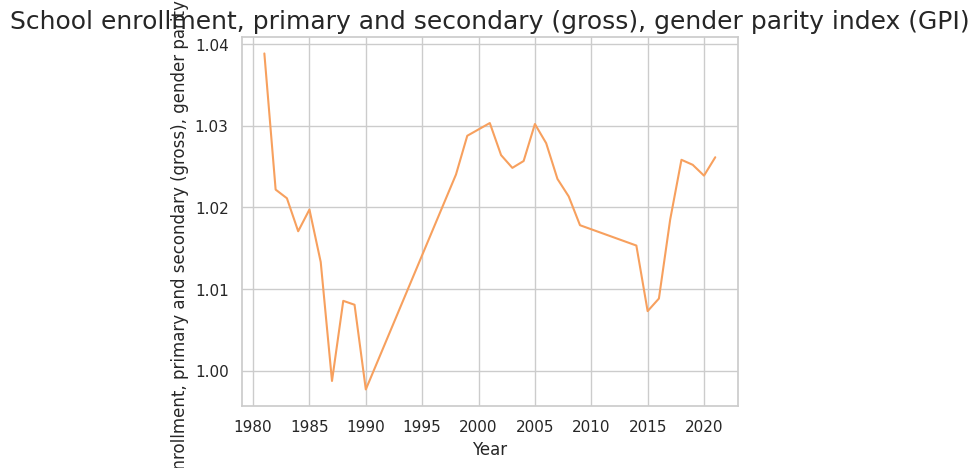

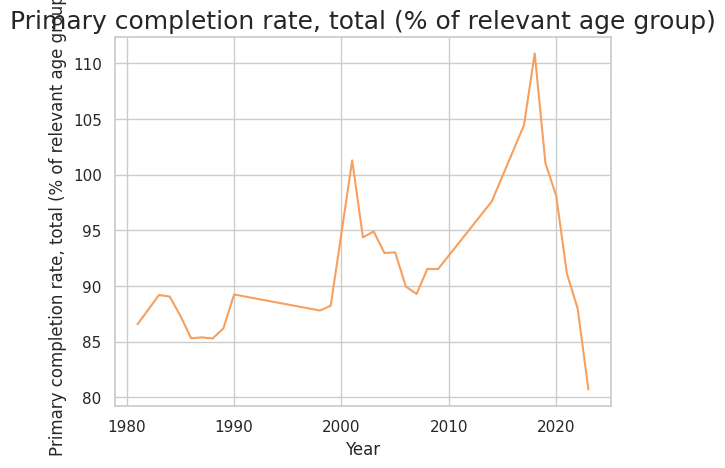

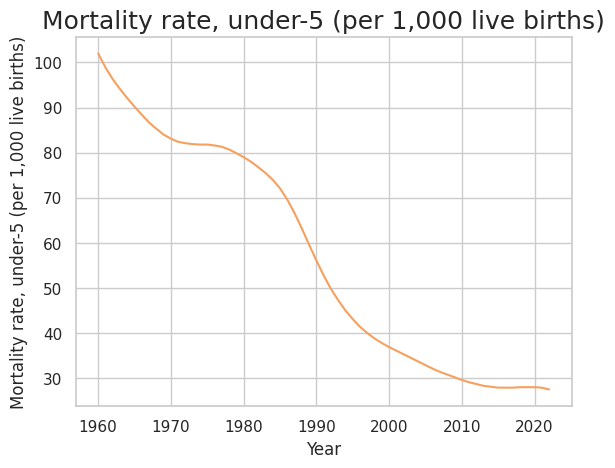

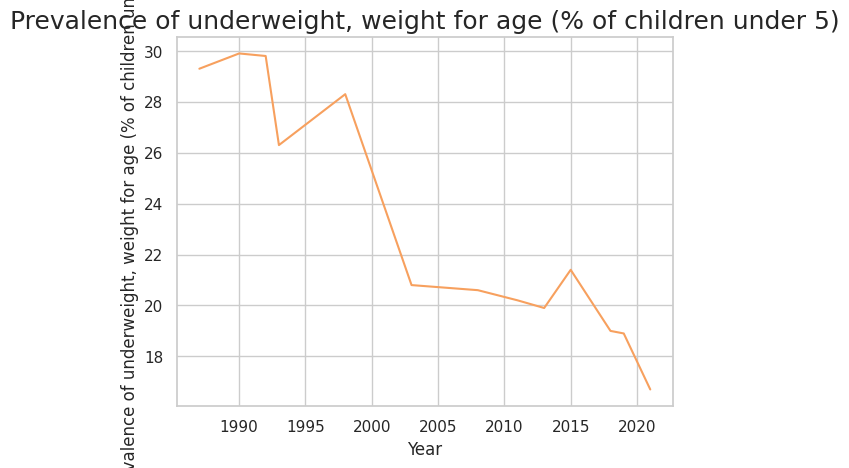

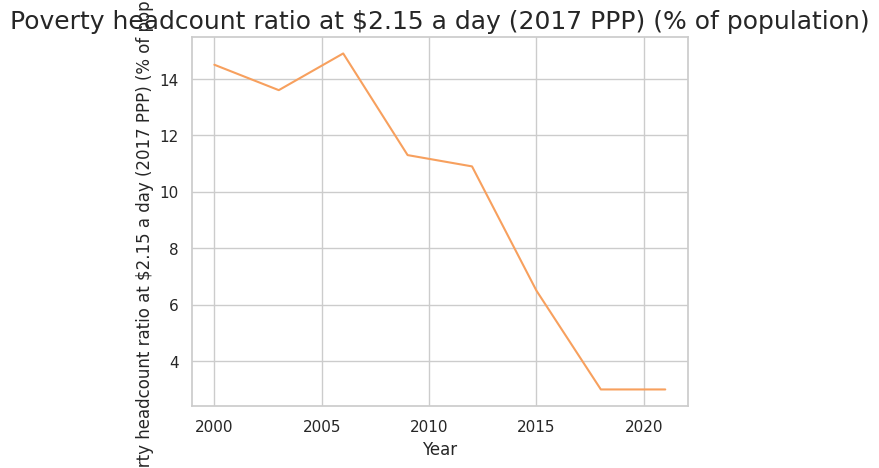

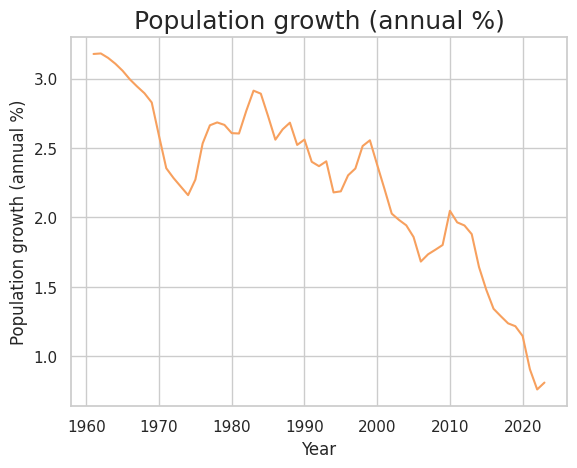

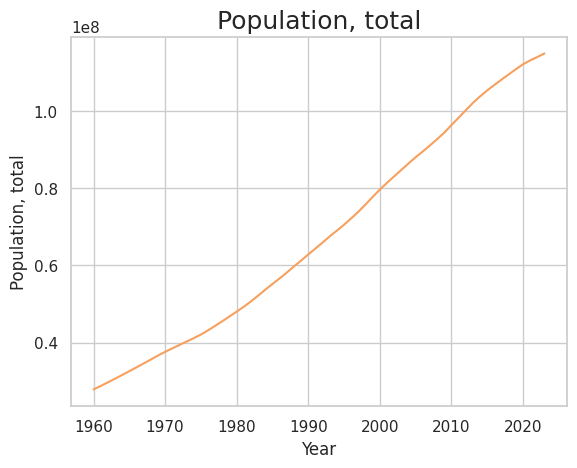

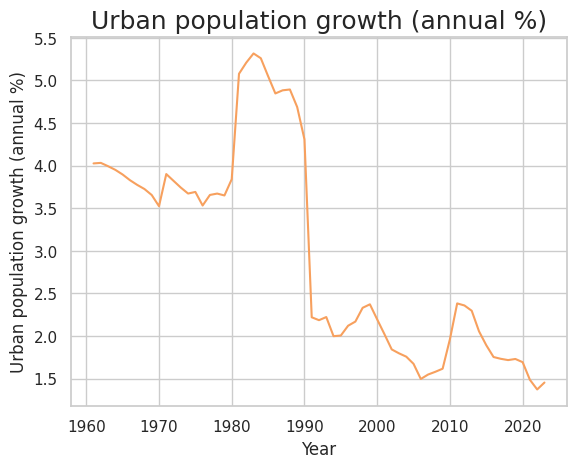

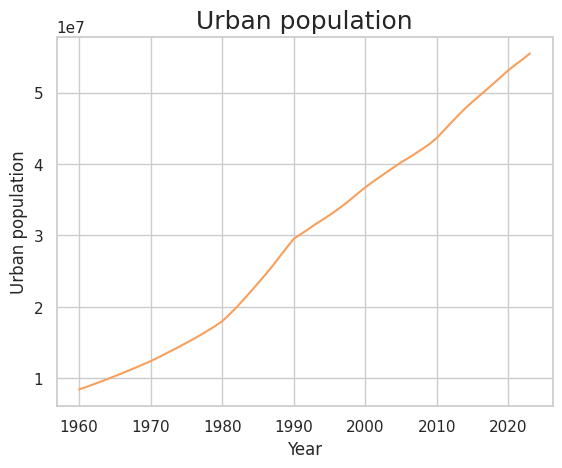

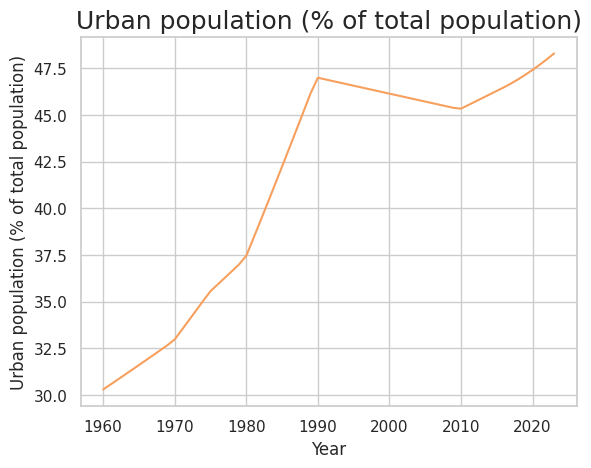

In [40]:
for col in df_wide.columns:
  make_lineplot(col)